In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def obj_func(m):
    u, s, vh = np.linalg.svd(m)

    return np.sum(s[1:])

epsilon = 1e-6

def comp_grad(m, boolMask, obj_func, n, epsilon):
    """ Computes gradient that maximizes the objective function """

    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))

    return grad

def comp_hessian(m, boolMask, of, n, epsilon):
    """ Computes hessian (only diagonal) """
    vector = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                vector.append(m[i,j])

    q = len(vector)
    hessian = np.zeros([q, q])

    # fill in the diagonal first
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:

                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian[count,count] = (of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2

                count = count + 1
                
    # now fill in off-diagonals
    count1 = 0
    for i1 in range(n):
        for j1 in range(n):
            if boolMask[i1,j1]: # found one
                diff1 = np.zeros([n,n])
                diff1[i1,j1] = epsilon

                count2 = 0
                for i2 in range(n):
                    for j2 in range(n):
                        if boolMask[i2,j2]: # found another one
                            diff2 = np.zeros([n,n])
                            diff2[i2,j2] = epsilon

                            if count1 != count2: # doing only off-diagonal ones
                                hessian[count1,count2] = (of(m + diff1 + diff2) + of(m - diff1 - diff2)
                                                         - of(m + diff1 - diff2) - of(m - diff1 + diff2))/(2*epsilon)**2

                            count2 = count2 + 1

                count1 = count1 + 1

    return hessian

In [4]:
n = 10
p = 0.5
rank = 1

U = np.random.randn(n, rank)
V = np.random.randn(n, rank)
original = np.dot(U, V.T)
mask = np.random.choice([0, 1], size=(n,n), p=[1-p, p])

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))

In [19]:
current_point = np.copy(original)

zeros = np.zeros([n,n])
current_point[boolMask] = zeros[boolMask]


epsilons = []
conds = []

for p in range(30):

    epsilon = 10**(-p)
    hessian = comp_hessian(current_point, boolMask, obj_func, n, epsilon)
    cond = np.linalg.cond(hessian)
    print(epsilon, cond)
    epsilons.append(epsilon)
    conds.append(cond)
    #grad = comp_grad(current_point, boolMask, obj_func, n, epsilon)


1 138.755150048024
0.1 593.9020678367357
0.01 4363.515139352455
0.001 153257.68379420054
0.0001 299933.06670902687
1e-05 381716.38780092064
1e-06 21293.75994055113
1e-07 415.1290011410645
1e-08 173.53886744561342
1e-09 46.85863388035139
1e-10 144.77538666760557
1e-11 3467.6536854964534
1e-12 74.16799023597862
1e-13 54.13706806380857
1e-14 199.50114239502892
1e-15 292.3731476236599
1e-16 4.301031397824608e+16
1e-17 1.9840446740437447e+81
1e-18 inf
1e-19 inf
1e-20 inf
1e-21 inf
1e-22 inf
1e-23 inf
1e-24 inf
1e-25 inf
1e-26 inf
1e-27 inf
1e-28 inf
1e-29 inf


(0, 1000000.0)

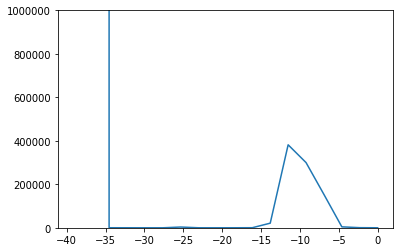

In [28]:
plt.plot(np.log(epsilons),conds)
plt.ylim(0, 1e6)

In [23]:
np.min(conds)

46.85863388035139

In [5]:
current_point = np.copy(original)

zeros = np.zeros([n,n])
current_point[boolMask] = zeros[boolMask]


epsilons = []
conds = []

for p in range(30):

    epsilon = p#10**(-p)
    hessian = comp_hessian(current_point, boolMask, obj_func, n, epsilon)
    cond = np.linalg.cond(hessian)
    print(epsilon, cond)
    epsilons.append(epsilon)
    conds.append(cond)
    #grad = comp_grad(current_point, boolMask, obj_func, n, epsilon)


/home/dplatonov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/home/dplatonov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars


0 nan
1 165.21528221215053
2 21.874302898103174
3 8.463321923178622
4 7.307001024820514
5 6.999637702121491
6 5.775807920730579
7 5.680275571843607
8 5.525997218928889
9 5.337245510396761
10 5.223522662348102
11 5.149773977522425
12 5.102156348202621
13 5.070318632541789
14 5.048804296330375
15 5.034305433951284
16 5.024662507967618
17 5.0183753814657655
18 5.014210685352689
19 5.010880955404508
20 5.0077575209284
21 5.005242853619097
22 5.003498357368047
23 5.0024436465039415
24 5.001957347759192
25 5.00192848058022
26 5.002265848005702
27 5.002908983890986
28 5.003778504461032
29 5.004824214310355


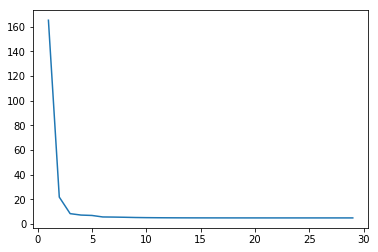

In [6]:
plt.plot(epsilons, conds)

So, it seems that 5 is the best epsilon